# Imports


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Data preparation

In [11]:
def DropMissingData(data):
  return (data.replace([' ?',' Holand-Netherlands'],pd.NA)).dropna()
def load_data(filename):
  return pd.read_csv(filename)
df_train = load_data('au_train.csv')
df_train = DropMissingData(df_train)
df_test = load_data('au_test.csv')
df_test = DropMissingData(df_test)
X = pd.concat((df_train,df_test)).sample(axis=0,frac=.5)
y = X['class'].copy().replace([' <=50K',' >50K'],[0,1])
X.drop(columns = ['class','fnlwgt','education-num'],inplace = True)
cat_data = X.select_dtypes(include=['object'])
num_data = X.select_dtypes(include=['int64'])
stdscaler = StandardScaler()
num_data_scaled = stdscaler.fit_transform(num_data)
onehotenc = OneHotEncoder()
cat_data_transformed = onehotenc.fit_transform(cat_data).toarray()
transformed_data = np.concatenate((num_data_scaled,cat_data_transformed),axis=1)

# Dimensionality Reduction

## t-Distributed Stochastic Neighbor Embedding

In [12]:
tsne = TSNE(n_components=2)
tsne_2d = tsne.fit_transform(transformed_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


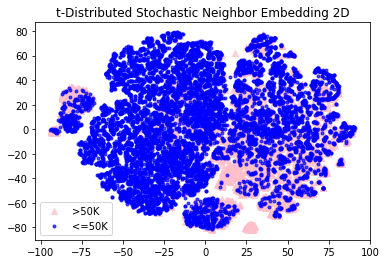

In [13]:
plt.scatter(tsne_2d[:,0][y == 1],tsne_2d[:,1][y == 1],c = 'pink',alpha = .7,marker = '^',label ='>50K')
plt.scatter(tsne_2d[:,0][y == 0],tsne_2d[:,1][y == 0],c = 'blue',alpha = .7,marker = '.',label ='<=50K')
plt.title('t-Distributed Stochastic Neighbor Embedding 2D')
plt.legend()

In [14]:
tsne = TSNE(n_components=3)
tsne_3d = tsne.fit_transform(transformed_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


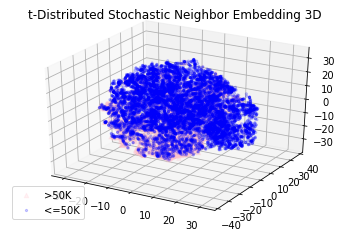

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_3d[:,0][y==1],tsne_3d[:,1][y==1],tsne_3d[:,2][y==1],c = 'pink',alpha = .2,marker = '^',label ='>50K')
ax.scatter(tsne_3d[:,0][y==0],tsne_3d[:,1][y==0],tsne_3d[:,2][y==0],c = 'blue',alpha = .2,marker = '.',label ='<=50K')
plt.title('t-Distributed Stochastic Neighbor Embedding 3D')
plt.legend(loc = 'lower left')

## Linear Principal Component Analysis

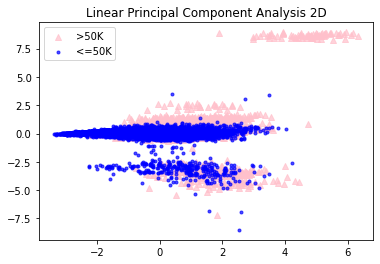

In [16]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(transformed_data)
plt.scatter(pca_2d[:,0][y == 1],pca_2d[:,1][y == 1],c = 'pink',alpha = .7,marker = '^',label ='>50K')
plt.scatter(pca_2d[:,0][y == 0],pca_2d[:,1][y == 0],c = 'blue',alpha = .7,marker = '.',label ='<=50K')
plt.title('Linear Principal Component Analysis 2D')
plt.legend()

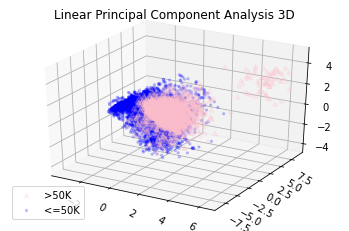

In [17]:
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(transformed_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:,0][y==1],pca_3d[:,1][y==1],pca_3d[:,2][y==1],c = 'pink',alpha = .2,marker = '^',label ='>50K')
ax.scatter(pca_3d[:,0][y==0],pca_3d[:,1][y==0],pca_3d[:,2][y==0],c = 'blue',alpha = .2,marker = '.',label ='<=50K')
plt.title('Linear Principal Component Analysis 3D')
plt.xticks(rotation = -30)
plt.yticks(rotation = -30)
plt.legend(loc = 'lower left')

## Kernel Principal Component Analysis

In [18]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=0.04)
kpca_2d = kpca.fit_transform(transformed_data)

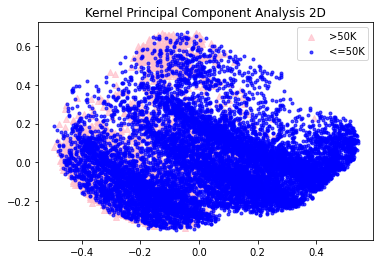

In [19]:
plt.scatter(kpca_2d[:,0][y == 1],kpca_2d[:,1][y == 1],c = 'pink',alpha = .7,marker = '^',label ='>50K')
plt.scatter(kpca_2d[:,0][y == 0],kpca_2d[:,1][y == 0],c = 'blue',alpha = .7,marker = '.',label ='<=50K')
plt.title('Kernel Principal Component Analysis 2D')
plt.legend()

In [20]:
kpca = KernelPCA(n_components=3,kernel="rbf", gamma=0.04)
kpca_3d = kpca.fit_transform(transformed_data)

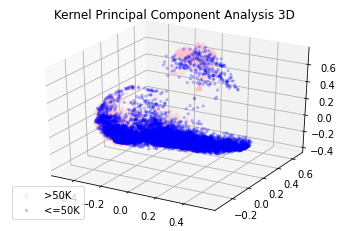

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kpca_3d[:,0][y==1],kpca_3d[:,1][y==1],kpca_3d[:,2][y==1],c = 'pink',alpha = .2,marker = '^',label ='>50K')
ax.scatter(kpca_3d[:,0][y==0],kpca_3d[:,1][y==0],kpca_3d[:,2][y==0],c = 'blue',alpha = .2,marker = '.',label ='<=50K')
plt.title('Kernel Principal Component Analysis 3D')
plt.legend(loc = 'lower left')

# Data Segmentation

## K-Means

Text(0.5, 1.0, 'Visualization of LPCA Data Prior to Segmentation')

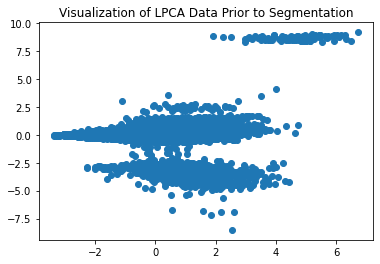

In [22]:
plt.scatter(pca_2d[:,0],pca_2d[:,1])
plt.title('Visualization of LPCA Data Prior to Segmentation')

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


Text(0.5, 1.0, 'Visualization of LPCA Data After Segmentation')

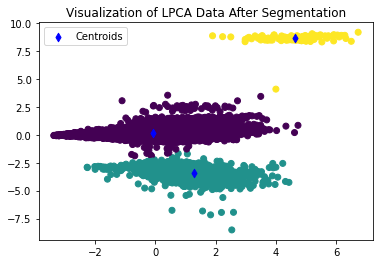

In [23]:
kmeans = KMeans(n_clusters=3, init=np.array([[0,0],[0,-2],[4,6]]))
kmeans.fit(pca_2d)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='d',c = 'blue',label='Centroids')
plt.legend()
plt.title('Visualization of LPCA Data After Segmentation')

# Insight Discovered

Plots show clustered and subclustered data.